<a href="https://colab.research.google.com/github/ZAVIER31/ZAVIER31/blob/main/auto_erkennen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from keras.datasets import cifar10
import math

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

import numpy as np
y_train_car= y_train ==1
X_train = X_train.astype(np.float32)/ 255.
X_test = X_test.astype(np.float32) / 255.

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train

[1]


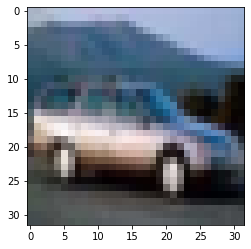

In [3]:
from tensorflow.python.util.tf_export import InvalidSymbolNameError
%matplotlib inline

import matplotlib.pyplot as plt
print(y_train[4])

plt.imshow(X_train[4])
plt.show()

In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


[[[-1.6621158  -1.6251584  -1.3994997 ]
  [-1.6621158  -1.6251584  -1.3994997 ]
  [-1.7312787  -1.7294943  -1.5073782 ]
  ...
  [ 0.15830377 -0.42149514 -0.814004  ]
  [ 0.13447964 -0.4223178  -0.7994712 ]
  [-0.00674888 -0.5373345  -0.88136005]]

 [[-1.5397512  -1.5870255  -1.4170095 ]
  [-1.5397512  -1.5870255  -1.4170095 ]
  [-1.5575876  -1.6550051  -1.5100336 ]
  ...
  [ 0.17290106 -0.41920114 -0.8436959 ]
  [ 0.12893838 -0.44630063 -0.85172373]
  [-0.0117872  -0.56125814 -0.9291244 ]]

 [[-1.3799102  -1.5418981  -1.4331602 ]
  [-1.3799102  -1.5418981  -1.4331602 ]
  [-1.3450117  -1.5612065  -1.4965373 ]
  ...
  [ 0.06556943 -0.5653493  -1.0001653 ]
  [-0.01045183 -0.6124721  -1.0246866 ]
  [-0.14160576 -0.6981403  -1.0570247 ]]

 ...

 [[ 1.4831108   0.9102597  -0.36176613]
  [ 1.4831108   0.9102597  -0.36176613]
  [ 1.3702425   0.7187136  -0.72799385]
  ...
  [ 0.00514231 -0.43371385 -0.9234574 ]
  [ 0.6409424   0.18005215 -0.5000882 ]
  [ 0.9736832   0.5233332  -0.27766192]]

 [

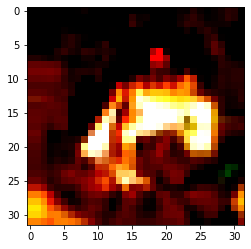

In [21]:
# RGB: (0.1, 0.1 ,0.9)

from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(
    width_shift_range= 3,
     height_shift_range=3, 
     zoom_range= 0.1,
      horizontal_flip= True,
      featurewise_center= True,
      featurewise_std_normalization=True

      )


gen.fit(X_train)
gen.flow(X_train, y_train, shuffle= False)
 


In [6]:
from keras.optimizers import Optimizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32, 32, 3), activation= "relu" ))
model.add(Conv2D(32, kernel_size=(3,3), activation= "relu" ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32, 32, 3), activation= "relu" ))
model.add(Conv2D(32, kernel_size=(3,3), activation= "relu" ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dense(1, activation ="sigmoid"))

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics= ["accuracy"])

In [5]:
print(y_train==1) #autos = class_1

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


In [ ]:
y_train = y_train == 1

gen = ImageDataGenerator(
    width_shift_range= 3,
     height_shift_range=3, 
     zoom_range= 0.1,
      horizontal_flip= True,
      featurewise_center= True,
      featurewise_std_normalization=True

      )



model.fit_generator(gen.flow(X_train, y_train, batch_size=128, shuffle= True), epochs= 10, workers=10)

Epoch 1/10


<ipython-input-24-e630e7d5fcd6>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen.flow(X_train, y_train, batch_size=128, shuffle= True), epochs= 10, workers=10)
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


391/391 [==============================] - 120s 302ms/step - loss: 0.0925 - accuracy: 0.9678
Epoch 2/10
391/391 [==============================] - 118s 298ms/step - loss: 0.0871 - accuracy: 0.9698
Epoch 3/10
391/391 [==============================] - 116s 294ms/step - loss: 0.0859 - accuracy: 0.9701
Epoch 4/10
247/391 [=================>............] - ETA: 42s - loss: 0.0832 - accuracy: 0.9706